<a href="https://colab.research.google.com/github/rituparna50/AstrophysicsLibraries/blob/main/Astrophysics_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASTROPHYSICS LIBRARIES AND FUNCTIONS FOR DATA ANALYSIS**

Astrophysics uses a common set of libraries between them. Astropy is a wodely used library by scientists, astronomores, aerospace engineers etc. Wherease, sunpy is a subset library within astropy, which primarily caters to Heliophysics - study of the Sun.

Installing astropy and sunpy libraries

In [ ]:
!pip install astropy
!pip install sunpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.9 MB/s eta 0:00:00


**Times in Astropy/SunPy**
Sunpy uses "astropy.time" module. This section explains how to parse times from different formats as well as construct and inspect time ranges.

**Parsing Times**
In the context of "sunpy.time.parse_time()', it means the process of converting a date or time string into a standardized format that can easily be understood and processed by a computer. While working with different dates and times, there are different formats such as DD-MM-YYYY or MM-DD-YYYY etc. This inconsistency in dating system poses a challenge to the computer interpreto. So, the parse_time() function simplifies this process by automatically recognizing and converting various data and time string formats into a common format.

In [ ]:
from sunpy.time import parse_time   # Library is sunpy, shelf/room is time. Function/book is parse_time
parse_time('2007-05-04T21:08:12')


<Time object: scale='utc' format='isot' value=2007-05-04T21:08:12.000>

In [ ]:
parse_time(894316092.00000, format='utime')   # Time input in seconds from epoch time

<Time object: scale='utc' format='utime' value=894316092.0>

# **Time Ranges**

Very common in astrophysics is working with pairs of times or time ranges. For dealing with such time ranges, sunpy library provides sunpy.time.TimeRange object. This object can be created by giving a starttime and an end time.

In [ ]:
from sunpy.time import TimeRange  #Sunoy library, shelf time, Book - TimeRange
time_range = TimeRange('2010/03/04 00:10', 400*u.second)
print (time_range)

    Start: 2010-03-04 00:10:00
    End:   2010-03-04 00:16:40
    Center:2010-03-04 00:13:20
    Duration:0.00462962962962965 days or
           0.1111111111111116 hours or
           6.666666666666696 minutes or
           400.00000000000176 seconds



In [ ]:
time_range.seconds  ## Time range function can be used to find total duration of the time range


<Quantity 400. s>

In [ ]:
#time_range.center

In [ ]:
time_range.split(2)  #Splits time block into 2 pieces

[   <sunpy.time.timerange.TimeRange object at 0x7f58f8d25ff0>
     Start: 2010-03-04 00:10:00
     End:   2010-03-04 00:13:20
     Center:2010-03-04 00:11:40
     Duration:0.002314814814814825 days or
            0.0555555555555558 hours or
            3.333333333333348 minutes or
            200.00000000000088 seconds,
     Start: 2010-03-04 00:13:20
     End:   2010-03-04 00:16:40
     Center:2010-03-04 00:15:00
     Duration:0.002314814814814825 days or
            0.0555555555555558 hours or
            3.333333333333348 minutes or
            200.00000000000088 seconds]

In [ ]:
time_range.split(3)   #Splits time block into 3 pieces

[   <sunpy.time.timerange.TimeRange object at 0x7f58f8d263e0>
     Start: 2010-03-04 00:10:00
     End:   2010-03-04 00:12:13
     Center:2010-03-04 00:11:06
     Duration:0.0015432098765432167 days or
            0.0370370370370372 hours or
            2.222222222222232 minutes or
            133.33333333333394 seconds,
     Start: 2010-03-04 00:12:13
     End:   2010-03-04 00:14:26
     Center:2010-03-04 00:13:20
     Duration:0.0015432098765432167 days or
            0.0370370370370372 hours or
            2.222222222222232 minutes or
            133.33333333333394 seconds,
     Start: 2010-03-04 00:14:26
     End:   2010-03-04 00:16:40
     Center:2010-03-04 00:15:33
     Duration:0.0015432098765432167 days or
            0.0370370370370372 hours or
            2.222222222222232 minutes or
            133.33333333333394 seconds]

# **Coordinates**

To find coordinates of any object in 3D space, the library astropy is used. So, particularly for this task - astropy.coordinates is used where coordinates is the module. Astropy.coordinates is used to represent points in physical space. This is applicable for booth points in 3D space and projected coordinates in images.

Within the astropy coordinates modules, there exists the SkyCoord class, which is vital here.



In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [ ]:
from sunpy.coordinates import frames  ## Importing a specific module called "frames" from the sunpy.coordinates package.
## It is used to enable the use of solar physics-specific coordinate frames int he code.
## By importing tis module, one can access and use the coordiante frames defined in the sunpy package

In [ ]:
##Creating a SkyCoord object to represent a point on the Sun
coord = SkyCoord(70*u.deg, -30*u.deg, obstime = "2017-08-01", frame=frames.HeliographicStonyhurst)
coord

<SkyCoord (HeliographicStonyhurst: obstime=2017-08-01T00:00:00.000, rsun=695700.0 km): (lon, lat) in deg
    (70., -30.)>

Here is a link of various coordinate systems that can be accessed. [link text](https://docs.sunpy.org/en/stable/reference/coordinates/index.html#sunpy-coordinate-systems)

In [ ]:
coord.transform_to(frames.Helioprojective(observer="earth"))

<SkyCoord (Helioprojective: obstime=2017-08-01T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (769.96270814, -498.89715922, 1.51668773e+08)>

In [ ]:
coord.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km)
    (49.84856512, 0.05394699, 1417743.94689472)>

SkyCoord and other coordinate frames support array coordinates. These work the same as singel value coordinates but they store multipe coordinates ina single opbject. So, when we do any operation to many differnt coordinates, this is a better choice than a list of SkyCoord objects, because this way is much faster than applying the operation to each Skycoord in a for loop.

In [ ]:
coord = SkyCoord([-500,400]*u.arcsec, [100,200]*u.arcsec, frame=frames.Helioprojective)
coord

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    [(-500., 100.), ( 400., 200.)]>

In [ ]:
coord[0]

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    (-500., 100.)>

In [ ]:
coord[1]

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    (400., 200.)>

# **Observer Location**

Both Helioprojective and Heliocentric frames are defined in terms of the position of the observer. So, to transform either of these frames to a different frame, the location of the observer must be known. The observer can be specified for a coordinate object using the "observer" argument to SkyCoord. For Sunpy to calculate the location of Earth or another solar system bod, it must know the time associated with the coordinate- this is specified with the obstime argument.

By using the observer location, it is possible to convert a coordnate as seen by obe observer to a coordinate seen by anitiher.

The "Helioprojective" frame is a perspective view from a specific observer location. So, this is about changing our perspective of where a solar object is in the sky, from one location to anotehr.

In [ ]:
hpc = SkyCoord(0*u.arcsec, 0*u.arcsec, observer="earth", obstime="2017-07-26", frame=frames.Helioprojective)

hpc.transform_to(frames.Helioprojective(observer="venus", obstime="2017-07-26"))

<SkyCoord (Helioprojective: obstime=2017-07-26T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'venus'>): (Tx, Ty, distance) in (arcsec, arcsec, AU)
    (-1285.47497992, 106.20918654, 0.72405937)>

**Using Coordinates with Maps**
Sunpy Maps use coordinates to specify locations on the image, and to  plot the overlays on these map plots. After a map is created, a coordinate frame is constructed from the header information, which can be accessed using .coordinate_frame

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [ ]:
import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

AIA20110607_063302_0171_lowres.fits:   0%|          | 0.00/973k [00:00<?, ?B/s]

In [ ]:
amap = sunpy.map.Map(AIA_171_IMAGE)
amap.coordinate_frame

<Helioprojective Frame (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>)>

In [ ]:
coord = SkyCoord(100*u.arcsec, 10*u.arcsec, frame=amap.coordinate_frame)
coord
## Used when creating a SkyCoord object to set the coordinate system to that image

<SkyCoord (Helioprojective: obstime=2011-06-07T06:33:02.770, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>): (Tx, Ty) in arcsec
    (100., 10.)>

In [ ]:
## Skycord object can be converted to a pair of pixels using GenericMap.wcs.world_to_pixel
pixels = amap.wcs.world_to_pixel(coord)
pixels

(array(551.7680511), array(515.18266871))

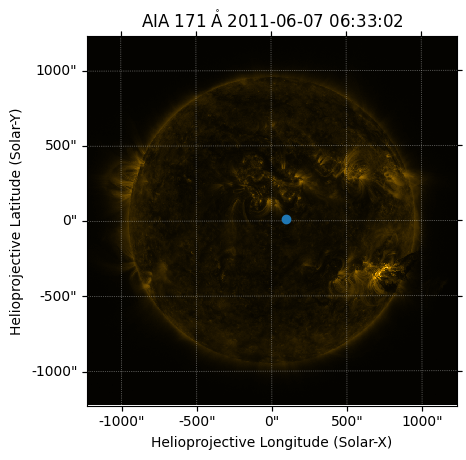

In [ ]:
## SkyCoord object can be used to plot a point on top of the map
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(projection=amap)
amap.plot()
ax.plot_coord(coord,'o')

# **ACQUIRING DATA**

Most Heliocentric data are stored on JSOC database.

Fido - Unified data search and retrieval tool. Provies simultaneous access to a variety of online data sources, some cover mltiple instruments and data products.

The Fido object is in sunpy.net.

Now, drms library is installed. drms is a Python library for accessing HMI, AIA and MDI fata with the JSOC interface. Sunoy often will interface with this drms library.

Sometimes libraries have dependencies that need to be installed separately. When installing a library, its always recommended to to check its documentation for a list of dependencies, or to use a package manager that automatically installs dependencies.

In [3]:
!pip install zeep
!pip install sunpy
!pip install drms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 59.4 MB/s eta 0:00:00


In this context, Fido is a unified interface provided by SunPy for searching and fetching solar physics data. Fido stands for Federate Internet Data Obtainer. It allows users to get solar physics data from a variety of sources using a single, consistent interface. This means that you can use the same commands and syntax to search for and download data from different providers, which can greatly simplify the process of obtaining solar physics data.

The data sources accesible through Fido include a variety of solar physics databases and data centers such as JSOC, Heliophysics Event Knowledgebase (HEK) etc.

In [4]:
from sunpy.net import Fido, attrs as a

## the Fido interface is imported from the SunPy library, along with a module attrs (renamed as a for convenience)
## that provides attributes used to specify search criteria.

In [ ]:
print(Fido)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


# **Searching for Data**

To search for data with Fido, there is a need to specify attributes to search with. Some examples of generic search attributes that work across many differnt data sources are -


*   a.Time
*   a.Instrument
*   a.Wavelength







In [5]:
a.Time('2012/3/4', '2012/3/6')

<sunpy.net.attrs.Time(2012-03-04 00:00:00.000, 2012-03-06 00:00:00.000)>

In [6]:
a.Instrument

Attribute Name,Client,Full Name,Description
aia,VSO,AIA,Atmospheric Imaging Assembly
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"
cerrotololo,VSO,Cerro Tololo,"Cerro Tololo, Chile GONG+ site"
chp,VSO,chp,Chromospheric Helium-I Imaging Photometer


This is a full list of known values, a description and which clients support those values (if you want to search using a specific data source). Printing attributes like this is supported for most attributes, including client secific ones.

In [9]:
result = Fido.search(a.Time('2012/3/4', '2012/3/6'),a.Instrument.hmi)
print(result)

Results from 1 Provider:

306 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 27.194 Mbyte

       Start Time               End Time        Source ...   Size   Wavetype
                                                       ...  Mibyte          
----------------------- ----------------------- ------ ... -------- --------
2012-03-04 00:00:00.000                      --    SDO ...  2.13379     LINE
2012-03-04 00:00:00.000                      --    SDO ...  2.13672     LINE
2012-03-04 00:00:00.000                      --    SDO ...  0.91504     LINE
2012-03-04 00:00:29.000 2012-03-04 00:28:15.000    SDO ... -0.00098   NARROW
2012-03-04 00:00:29.000 2012-03-04 00:28:15.000    SDO ... -0.00098   NARROW
2012-03-04 00:00:29.000 2012-03-04 00:28:15.000    SDO ... -0.00098   NARROW
2012-03-04 00:28:59.000 2012-03-04 00:58:15.000    SDO ... -0.00098   NARROW
2012-03-04 00:28:59.000 2012-03-04 00:58:15.000    SDO ... -0.00098   NARROW
2012-03-04 0

/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


This returns an *UnifiedResponse* object containing all search results that match the search attributes. This does not download the files, which is done in "Downlaoding data" section.

Queries are made more flexible or very specific by adding more attrs objects to the Fido search. Such as specific passbands can be searched for by supplying a **Quantity** to the **a.Wavelength** attribute.

In [12]:
import astropy.units as u
Fido.search(a.Time('2012/3/4','2012/3/4'), a.Instrument.aia, a.Wavelength(171*u.angstrom))

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2012-03-04 00:00:00.000,2012-03-04 00:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


Data of a particular cadence can also be specified using the a.Sample attribute

In [13]:
Fido.search(a.Time('2012/3/4', '2012/3/6'), a.Instrument.aia, a.Wavelength(171*u.angstrom), a.Sample(120*u.minute))

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2012-03-04 00:00:00.000,2012-03-04 00:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2012-03-04 02:00:00.000,2012-03-04 02:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2012-03-04 04:00:00.000,2012-03-04 04:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2012-03-04 06:00:00.000,2012-03-04 06:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2012-03-04 08:00:00.000,2012-03-04 08:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2012-03-04 10:00:00.000,2012-03-04 10:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2012-03-04 12:00:00.000,2012-03-04 12:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2012-03-04 14:00:00.000,2012-03-04 14:00:01.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


To search for data from multiple instruments, wavelngths, times etc. use the pipe  |  operator which joins queries using a logical "OR" operator. Here, we will search for LYRA or RHESSI data in a given time rane.

In [20]:
Fido.search(a.Time('2012/3/4', '2012/3/4 02:00'), a.Instrument.lyra  |  a.Instrument.rhessi)

<sunpy.net.fido_factory.UnifiedResponse object at 0x7e010233add0>
Results from 3 Providers:

2 Results from the LYRAClient:
Source: http://proba2.oma.be/lyra/data/bsd

       Start Time               End Time        Instrument ... Provider Level
----------------------- ----------------------- ---------- ... -------- -----
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999       LYRA ...      ESA     2
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999       LYRA ...      ESA     3

1 Results from the RHESSIClient:
Source: https://hesperia.gsfc.nasa.gov/hessidata

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999     RHESSI ... RHESSI     NASA

3 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2012-03-03 22:57:40.000 2012-03-04 00:33:20.000 RHESSI ... PARTIAL_SUN -0.00098
2012-03-04 00:33:20.000 2012-03-04 01:45:40.000 RHESSI ... PARTIAL_SUN -0.00098
2012-03-04 01:45:40.000 2012-03-04 02:09:00.000 RHESSI ... PARTIAL_SUN -0.00098

**# WORKING WITH SEARCH RESULTS**

Fido.search can make multiple queries to multiple clients in one search. This indicates that the results of a call to search can contain many sets of records, called responses, from many clients.

In [22]:
results = Fido.search(a.Time("2012/1/1", "2012/1/2"), a.Level.two, a.Instrument.lyra  |  a.Instrument.eve)
results

<sunpy.net.fido_factory.UnifiedResponse object at 0x7e010223c820>
Results from 2 Providers:

2 Results from the LYRAClient:
Source: http://proba2.oma.be/lyra/data/bsd

       Start Time               End Time        Instrument ... Provider Level
----------------------- ----------------------- ---------- ... -------- -----
2012-01-01 00:00:00.000 2012-01-01 23:59:59.999       LYRA ...      ESA     2
2012-01-02 00:00:00.000 2012-01-02 23:59:59.999       LYRA ...      ESA     2

50 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2012-01-01 00:00:00.000 2012-01-01 01:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 00:00:00.000 2012-01-01 01:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 01:00:00.000 2012-01-01 02:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 01:00:00.000 2012-01-01 02:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 02:00:00.000 2012-01-01 03:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 02:00:00.000 2012-01-01 03:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 03:00:00.000 2012-01-01 04:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 03:00:00.000 2012-01-01 04:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 04:00:00.000 2012-01-01 05:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 04:00:00.000 2012-01-01 05:00:00.000    SDO ...    FULLDISK -0.00098
                    ...                     ...    ... ...         ...      ...
2012-01-01 20:00:00.000 2012-01-01 21:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 20:00:00.000 2012-01-01 21:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 21:00:00.000 2012-01-01 22:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 21:00:00.000 2012-01-01 22:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 22:00:00.000 2012-01-01 23:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 22:00:00.000 2012-01-01 23:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 23:00:00.000 2012-01-02 00:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-01 23:00:00.000 2012-01-02 00:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-02 00:00:00.000 2012-01-02 01:00:00.000    SDO ...    FULLDISK -0.00098
2012-01-02 00:00:00.000 2012-01-02 01:00:00.000    SDO ...    FULLDISK -0.00098
Length = 50 rows

In [23]:
results[0,:]

Start Time,End Time,Instrument,Physobs,Source,Provider,Level
Time,Time,str4,str10,str6,str3,int64
2012-01-01 00:00:00.000,2012-01-01 23:59:59.999,LYRA,irradiance,PROBA2,ESA,2
2012-01-02 00:00:00.000,2012-01-02 23:59:59.999,LYRA,irradiance,PROBA2,ESA,2


In [24]:
results["lyra"]  ## Can also be written as results [0,:]

Start Time,End Time,Instrument,Physobs,Source,Provider,Level
Time,Time,str4,str10,str6,str3,int64
2012-01-01 00:00:00.000,2012-01-01 23:59:59.999,LYRA,irradiance,PROBA2,ESA,2
2012-01-02 00:00:00.000,2012-01-02 23:59:59.999,LYRA,irradiance,PROBA2,ESA,2


To do normal slicing operations on any Python sequence, e.g results[1, ::10] to access every tenth file in the result returned by the second client.

The UnifiedResponse obejct contains many response tables which make up the search results. Each of the responses ar QueryResponseTable objects, which are astropy.table objects meaning that one can interact with them and filter them like any other tabular data. This can be used to interact with results which are metadata only, i.e searches from the HEK, or it can be used to reduce the number of files downloaded by Fido.fetch.

In [25]:
results = Fido.search(a.Time("2020/01/01", "2020/01/01 00:01"), a.Instrument.aia  |
 a.Instrument.hmi)
results

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2020-01-01 00:00:00.000,2020-01-01 00:00:01.000,SDO,AIA,335.0 .. 335.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2020-01-01 00:00:04.000,2020-01-01 00:00:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2020-01-01 00:00:05.000,2020-01-01 00:00:06.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2020-01-01 00:00:05.000,2020-01-01 00:00:06.000,SDO,AIA,4500.0 .. 4500.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2020-01-01 00:00:06.000,2020-01-01 00:00:07.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2020-01-01 00:00:09.000,2020-01-01 00:00:10.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2020-01-01 00:00:09.000,2020-01-01 00:00:10.000,SDO,AIA,211.0 .. 211.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2020-01-01 00:00:11.000,2020-01-01 00:00:12.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


The VSO client returns a lot of information about the records, so the first thng we can do is show inly the columns we are itnerested in. We can inspect all the availabe column names in the above response as following -

In [26]:
results.all_colnames

['End Time',
 'Extent Length',
 'Extent Type',
 'Extent Width',
 'Instrument',
 'Physobs',
 'Provider',
 'Size',
 'Source',
 'Start Time',
 'Wavelength',
 'Wavetype',
 'fileid']

With the wide range of column names, now we can choose which particular column we want more information from.

In [27]:
results.show("Start Time", "Instrument", "Physobs", "Wavelength")

#Physobs is for Physical Observable. Refers to the specific physical quantity that is being observed or measured by a particular instrument.

Start Time,Instrument,Physobs,Wavelength
,,,Angstrom
Time,str3,str9,float64[2]
2020-01-01 00:00:00.000,AIA,intensity,335.0 .. 335.0
2020-01-01 00:00:04.000,AIA,intensity,193.0 .. 193.0
2020-01-01 00:00:05.000,AIA,intensity,304.0 .. 304.0
2020-01-01 00:00:05.000,AIA,intensity,4500.0 .. 4500.0
2020-01-01 00:00:06.000,AIA,intensity,131.0 .. 131.0
2020-01-01 00:00:09.000,AIA,intensity,171.0 .. 171.0
2020-01-01 00:00:09.000,AIA,intensity,211.0 .. 211.0
2020-01-01 00:00:11.000,AIA,intensity,94.0 .. 94.0


# **DOWNLOADING DATA**

After files are located via a **Fido.search**, these files can be downloaded by **Fido.fetch**



In [29]:
download_files = Fido.fetch(results[0,0])
download_files

Files Downloaded: 0file [00:00, ?file/s]

[]
Errors:
(<parfive.results.Error object at 0x7e014eb6c630>
,
,
{
    'version': None,
    'info': None,
    'provider': None,
    'getdataitem': {
        'dataitem': [
            {
                'provider': 'JSOC',
                'url': None,
                'fileiditem': None
            }
        ]
    },
    'status': 'VSO-D500 Error communicating with Data Provider',
    'debug': "soap:Server.Transport : 500 Can't connect to sdo7.nascom.nasa.gov:80 (Network is unreachable)",
    'details': None,
    'method': None
})

In [36]:
print(download_files.errors)

,
,
{
    'version': None,
    'info': None,
    'provider': None,
    'getdataitem': {
        'dataitem': [
            {
                'provider': 'JSOC',
                'url': None,
                'fileiditem': None
            }
        ]
    },
    'status': 'VSO-D500 Error communicating with Data Provider',
    'debug': "soap:Server.Transport : 500 Can't connect to sdo7.nascom.nasa.gov:80 (Network is unreachable)",
    'details': None,
    'method': None
}]
